# K-Means
- Common clustering technique, helps to solve many problems efficiently.
- K-Means is an example of Hard Clustering, where every point belongs only to one cluster.

## Motivation Problem - *Pizza Parlour Study*

**Problem Statement** Given the list of locations of customers who frequently order Pizza we want to find out optimal locations of Pizza Parlours where they should be opened.

<img src="pizza1.png" alt="Pizza-1" style="width: 400px;"/>


**Step-1** : Initialise Pizza Parlour Centers randomly.

<img src="pizza2.png" alt="Pizza-2" style="width: 400px;"/>


**Step-2** : Assign each customer to its nearest Pizza Center.

<img src="pizza3.png" alt="Pizza-3" style="width: 400px;"/>


**Step-3** : Update the Center Location by taking mean of customers assigned to it.

<img src="pizza4.png" alt="Pizza-4" style="width: 400px;"/>


**Step-4** : Repeat Steps 2 and 3 Until Convergence.

<img src="pizza5.png" alt="Pizza-5" style="width: 400px;"/>

## K-Means Algorithm

**Input Data** : X = {x1,...,xN}

**Goal** : Partition the data among some K number of clusters. Let us assume K is known to us.

Let µk denote the center of Kth Cluster (uk will be vector)

So we need to ﬁnd an assignment of data points to clusters,
as well as a set of cluster centers{µk}, such that the sum of the squares 
of the distances of each data point to its closest cluster center µk, is a minimum. 




<img src="k-means.png" alt="Pizza-1" style="width: 600px;"/>


## Implementation



In [4]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs


## Dataset Preparation

In [5]:
X,y  = make_blobs?

Signature:
make_blobs(
    n_samples=100,
    n_features=2,
    *,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False,
)
Docstring:
Generate isotropic Gaussian blobs for clustering.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int or array-like, default=100
    If int, it is the total number of points equally divided among
    clusters.
    If array-like, each element of the sequence indicates
    the number of samples per cluster.

    .. versionchanged:: v0.20
        one can now pass an array-like to the ``n_samples`` parameter

n_features : int, default=2
    The number of features for each sample.

centers : int or ndarray of shape (n_centers, n_features), default=None
    The number of centers to generate, or the fixed center locations.
    If n_samples is an int and centers is None, 3 centers are generated.
    If n_samples is array-like, centers mus

In [172]:
X,y  = make_blobs(n_samples=500,n_features=2,centers=5,random_state=7)
# X is our data
# y can be used to determine the accuracy of our clustering

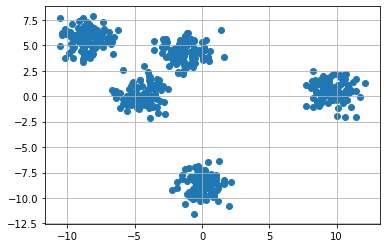

In [173]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])  # pass in c = y attributes to color the clusters. But we won't since we will try to cluster them ourselves using K-Means.
plt.show()

In [174]:
# number of clusters we will have
k = 5
# colors of our clusters
color  = ["green","red","blue","yellow","orange"]

# empty dictionary that store all the clusters
clusters = {}

# store information about each cluster
for i in range(k):
    center = 10*(2*np.random.random((X.shape[1]))-1)   # make any random point as the center of the cluster (generates number bw -10 and 10)
    points = []
    
    cluster = {
        'center':center,
        'points':points,
        'color': color[i]
        }
    # store each cluster information in dictionary
    clusters[i] = cluster




In [175]:
# print the cluster dictionary
print(clusters)

{0: {'center': array([2.39853729, 7.26558414]), 'points': [], 'color': 'green'}, 1: {'center': array([4.67706436, 6.62010757]), 'points': [], 'color': 'red'}, 2: {'center': array([-7.10781882, -9.74299653]), 'points': [], 'color': 'blue'}, 3: {'center': array([4.96030264, 5.14055813]), 'points': [], 'color': 'yellow'}, 4: {'center': array([-1.81470229,  1.98910166]), 'points': [], 'color': 'orange'}}


In [176]:
# euclidien distance helper function
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [177]:

# Assign every data point to one of the clusters
def assignPointToClusters(clusters):
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]

        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)    
        clusters[current_cluster]['points'].append(curr_x)
        
#  We update every cluster center according to the mean of the points in it
def updateClusters(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: #If a cluster has some-nonzero points
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = [] #Clear the list 
                    
    

def plotClusters(clusters):
    for kx in range(k):
        #print(len(clusters[kx]['points']))
        
        pts = np.array(clusters[kx]['points'])
        print(pts.shape)
        
        #Plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        #Plot the cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")
   
    

In [178]:
clusters

{0: {'center': array([2.39853729, 7.26558414]),
  'points': [],
  'color': 'green'},
 1: {'center': array([4.67706436, 6.62010757]), 'points': [], 'color': 'red'},
 2: {'center': array([-7.10781882, -9.74299653]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([4.96030264, 5.14055813]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([-1.81470229,  1.98910166]),
  'points': [],
  'color': 'orange'}}

In [179]:
assignPointToClusters(clusters)

(12, 2)
(0,)
(99, 2)
(100, 2)
(289, 2)


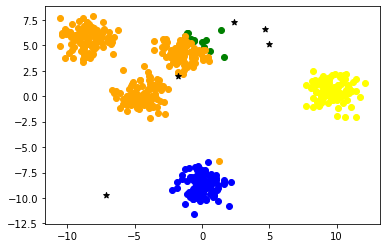

In [180]:
plotClusters(clusters)

In [181]:
updateClusters(clusters)


(88, 2)
(0,)
(100, 2)
(100, 2)
(212, 2)


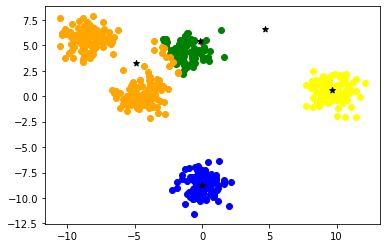

In [182]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)



(101, 2)
(0,)
(100, 2)
(100, 2)
(199, 2)


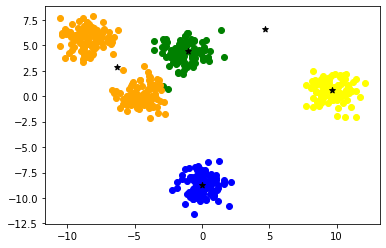

In [183]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

(104, 2)
(1, 2)
(100, 2)
(100, 2)
(195, 2)


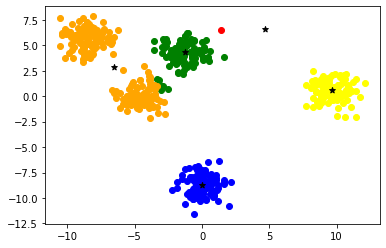

In [184]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)


(105, 2)
(3, 2)
(100, 2)
(100, 2)
(192, 2)


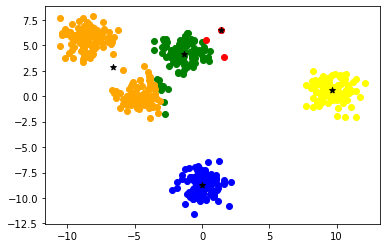

In [185]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)


(100, 2)
(11, 2)
(100, 2)
(100, 2)
(189, 2)


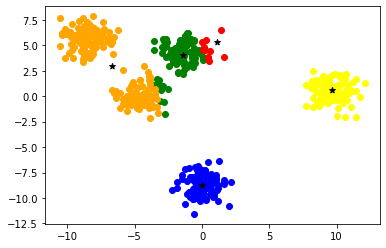

In [186]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

(91, 2)
(27, 2)
(100, 2)
(100, 2)
(182, 2)


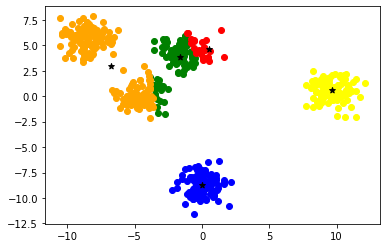

In [187]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

(94, 2)
(50, 2)
(100, 2)
(100, 2)
(156, 2)


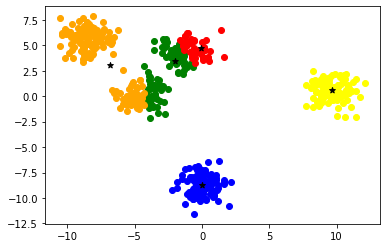

In [188]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

(112, 2)
(82, 2)
(100, 2)
(100, 2)
(106, 2)


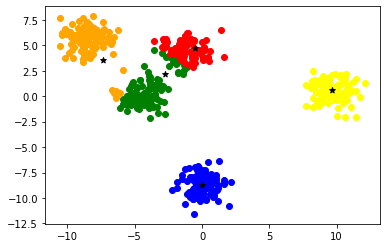

In [189]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

(101, 2)
(99, 2)
(100, 2)
(100, 2)
(100, 2)


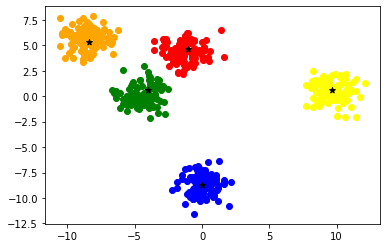

In [190]:

assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

(101, 2)
(99, 2)
(100, 2)
(100, 2)
(100, 2)


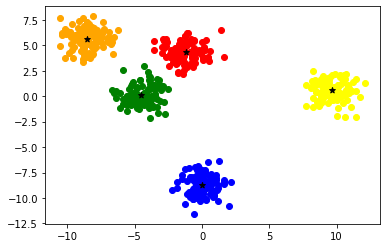

In [191]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

(101, 2)
(99, 2)
(100, 2)
(100, 2)
(100, 2)


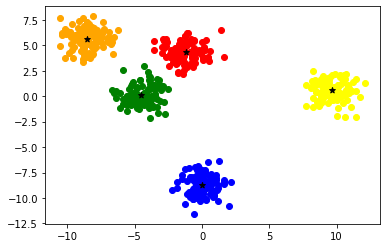

In [192]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)